#### iris 데이터셋 활용 꽃잎 너비 예측
 - 데이터셋 : iris.csv에서 2개 Feature 사용
 - 구현프레임워크 : Pytorch

- [1] 모듈 로딩 및 데이터 준비

In [346]:
# 모듈 로딩
import torch                    # 텐서 및 수치 계산 함수 관련 모듈
import torch.nn as nn           # 인공신경망 관련 모듈
import torch.nn.functional as F    # 손실, 거리 등 함수 관련 모듈
import torch.optim as optimizer # 최적화 기법 관련 모듈

import pandas as pd             # 데이터 파일 분석 관련 모듈
from sklearn.model_selection import train_test_split

In [347]:
# 데이터 로딩 : csv => DataFrame
DATA_FILE = "C:\Git\KDT\BigData\ML_Work\data\Iris.csv"

irisDF = pd.read_csv(DATA_FILE, usecols=[0,1,2,3])
irisDF.head(2)

,sepal.length,sepal.width,petal.length,petal.width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2


[2] 모델 준비
 - 학습 방법 : 지도학습 > 회귀
 - 알고리즘 : 선형관계 >> 선형모델 ==> nn.Linear

In [348]:
# in_features : petal.length 1개 
# out_features : petal.width 1개
model = nn.Linear(3,1)

In [349]:
# 가중치와 절편 확인
print(model.named_parameters())

<generator object Module.named_parameters at 0x000001958FFB0BA0>


In [350]:
for name, param in model.named_parameters():
    print(f'[{name}] {param}')

[weight] Parameter containing:
tensor([[ 0.4416,  0.3941, -0.5404]], requires_grad=True)
[bias] Parameter containing:
tensor([0.4914], requires_grad=True)


[3] 최적화 인스턴스 준비

In [351]:
#### 모델의 가중치와 절편을 최적화 ==> 인스턴스에 전달
adam_optim = optimizer.Adam(model.parameters(), lr=0.1)

[4] 학습 ==> 개발자가 구현

-[4-1] 데이터셋 Tensor화 진행 : 데이터준비 시 진행하거나 또는 학습 전 진행

In [352]:
featureTS = torch.from_numpy(irisDF[irisDF.columns[:-1]].values).float()
featureTS.shape

torch.Size([150, 3])

In [353]:
# irisDF['petal.length'].values.float()

In [354]:
targetTS = torch.from_numpy(irisDF[['petal.width']].values).float()
targetTS.shape

torch.Size([150, 1])

In [355]:
X_train, X_test, y_train, y_test = train_test_split(featureTS,
                                                    targetTS,
                                                    test_size = 0.2)

# Train & valid
X_train, X_val, y_train, y_val = train_test_split(X_train,
                                                  y_train,
                                                  test_size = 0.2)

print(f'TRAIN {X_train.shape}, TEST {X_test.shape}, VAL {X_val.shape}')
print(f'TRAIN {y_train.shape}, TEST {y_test.shape}, VAL {y_val.shape}')

TRAIN torch.Size([96, 3]), TEST torch.Size([30, 3]), VAL torch.Size([24, 3])
TRAIN torch.Size([96, 1]), TEST torch.Size([30, 1]), VAL torch.Size([24, 1])


- [4-2] 학습진행
    - 학습횟수 결정 ==> 에포크 설정
    - 학습결과 저장 ==> 손실저장 변수

In [356]:
EPOCH = 10


In [357]:
##  테스트/검증 함수
# ==> 가중치, 절편 업데이트 X,  최적화 미진행 
# ==> 현재 가중치와 절편값으로 테스트 진행 
def testing(testTS, targetTS, kind = 'val'):
    # val_history = []

    with torch.no_grad():   # 가중치 및 절편 업데이트 진행 X
        # -(1) 학습 진행 - forward
        pre_y = model(testTS)
        print(f'{pre_y.shape}')

        # -(2) 오차계산 - 손실함수
        loss = F.mse_loss(pre_y, targetTS)


        # -(4) 학습결과 출력 및 저장
        print(f'[{kind}] LOSS : {loss}')
    return loss

In [358]:
def training(featureTS, targetTS, valTS,valTargetTS):
    loss_history = [[],[]]

    for epoch in range(EPOCH):
        # -(1) 학습 진행 순전파 forward
        pre_y = model(featureTS)
        print(f'{pre_y.shape}')

        # -(2) 오차계산 - 손실함수
        loss = F.mse_loss(pre_y, targetTS)
        loss_history[0].append(loss.item())   #tensor 형태니까.

        # -(3) 최적화 - 가중치,절편 업데이트 backward
        adam_optim.zero_grad()
        loss.backward()
        adam_optim.step()

        # (4) 검증 - 모델이 제대로 돌아가는지 검사
        val_loss = testing(valTS, valTargetTS)
        loss_history[1].append(val_loss)

        # -(4) 학습결과 출력 및 저장
        print(f'[{epoch}/{EPOCH}] LOSS : {loss}')

    return loss_history

In [359]:
# 모델 학습 진행
loss = training(X_train, y_train, X_val, y_val)

torch.Size([96, 1])
torch.Size([24, 1])
[val] LOSS : 2.7747716903686523
[0/10] LOSS : 3.0850188732147217
torch.Size([96, 1])
torch.Size([24, 1])
[val] LOSS : 2.4939284324645996
[1/10] LOSS : 2.875828504562378
torch.Size([96, 1])
torch.Size([24, 1])
[val] LOSS : 2.103593111038208
[2/10] LOSS : 2.674025535583496
torch.Size([96, 1])
torch.Size([24, 1])
[val] LOSS : 2.0248377323150635
[3/10] LOSS : 2.057605504989624
torch.Size([96, 1])
torch.Size([24, 1])
[val] LOSS : 2.040001630783081
[4/10] LOSS : 1.7508344650268555
torch.Size([96, 1])
torch.Size([24, 1])
[val] LOSS : 1.7861264944076538
[5/10] LOSS : 1.6735080480575562
torch.Size([96, 1])
torch.Size([24, 1])
[val] LOSS : 1.3246426582336426
[6/10] LOSS : 1.4611567258834839
torch.Size([96, 1])
torch.Size([24, 1])
[val] LOSS : 0.9077587127685547
[7/10] LOSS : 1.1167330741882324
torch.Size([96, 1])
torch.Size([24, 1])
[val] LOSS : 0.667133629322052
[8/10] LOSS : 0.8405501246452332
torch.Size([96, 1])
torch.Size([24, 1])
[val] LOSS : 0.536356

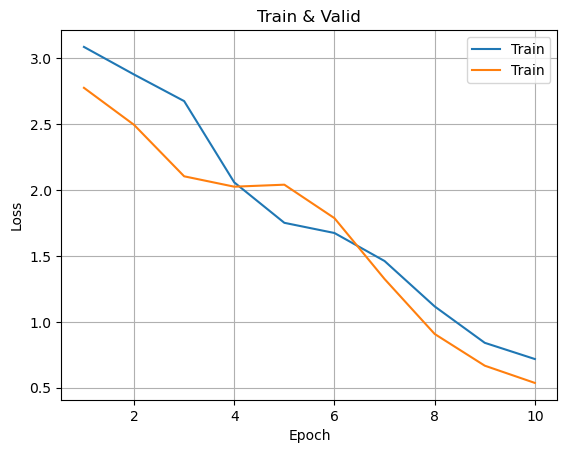

In [360]:
# 학습 후 loss 시각화
import matplotlib.pyplot as plt

plt.plot(range(1,11), loss[0], label='Train')
plt.plot(range(1,11), loss[1], label='Train')
plt.title('Train & Valid')
plt.grid()
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()